In [1]:
import numpy as np
import pylab as mplot
from numpy.linalg import inv
%pylab inline
import matplotlib
from matplotlib.patches import Ellipse
# mplot.rc('text', usetex=True)
mplot.rc('font', family='serif')
import os

def eigsorted(cov):
    vals, vecs = np.linalg.eigh(cov)
    order = vals.argsort()[::-1]
    return vals[order], vecs[:,order]

def get_ellipse(fisher):
    
    # marginalize over all other than Omega_m and A_s
    inv_fisher = np.zeros((2,2))
    inv_fisher[0,0] = inv(fisher)[0,0]
    inv_fisher[0,1] = inv(fisher)[0,1]
    inv_fisher[1,0] = inv(fisher)[1,0]
    inv_fisher[1,1] = inv(fisher)[1,1]
    print(inv_fisher)
    fisher_red = inv(inv_fisher)
    smallC = inv(fisher_red)

    vals, vecs = eigsorted(smallC)
    theta = np.degrees(np.arctan2(*vecs[:,0][::-1]))
    print(vals, theta)
    
    return vals, theta

def plot_ellipse(vals, theta, color, label, nsigma, lw, ls):
    
    for i in range(nsigma):
        width, height = 2 * (i+1) * np.sqrt(vals)
        if i==(nsigma-1):
            ellip = Ellipse(xy=[0.22,0.8], width=width, height=height, angle=theta, facecolor='none', label=label, edgecolor=color, lw=lw, ls=ls)
        else:
            ellip = Ellipse(xy=[0.22,0.8], width=width, height=height, angle=theta, facecolor='none', edgecolor=color, lw=lw, ls=ls)
            
        mplot.gca().add_patch(ellip)
    
    return

def get_nsample(filename):
    with open(filename,"r") as fi:
        for ln in fi:
            if ln.startswith("#nsample="):
                nsamples = int(ln[9:])
    return nsamples

Populating the interactive namespace from numpy and matplotlib


In [2]:
cosmodc2_fisher_firecrown = np.loadtxt('/global/homes/c/chihway/txpipe-cosmodc2/firecrown_config/fisher.txt')
cosmodc2_fisher_cosmosis = np.loadtxt('/global/homes/c/chihway/txpipe-cosmodc2/cosmosis_config/chain.txt')

[[ 0.00105488 -0.00164151]
 [-0.00164151  0.00260881]]
[3.64795288e-03 1.57405015e-05] 122.33537566561438
[[ 0.00113536 -0.00176434]
 [-0.00176434  0.00279359]]
[3.91391988e-03 1.50353295e-05] 122.41492354988652


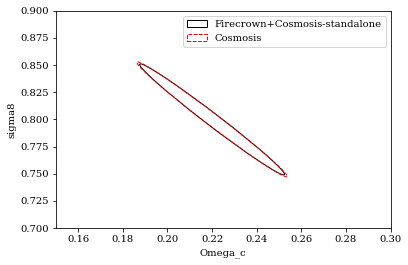

In [3]:
# mplot.figure(figsize=(4,3))

vals, theta = get_ellipse(cosmodc2_fisher_firecrown)
plot_ellipse(vals, theta, 'k', 'Firecrown+Cosmosis-standalone', 1, 1, '-')

vals, theta = get_ellipse(cosmodc2_fisher_cosmosis)
plot_ellipse(vals, theta, 'r', 'Cosmosis', 1, 1, '--')

mplot.legend()
mplot.xlim(0.15,0.3)
mplot.ylim(0.7,0.9)
mplot.xlabel('Omega_c')
mplot.ylabel('sigma8')
mplot.savefig('fisher.pdf', bbox_inches='tight')

In [4]:
import sys
sys.path.insert(0,'/global/homes/c/chihway/.conda/envs/myenv/lib/python3.7/site-packages/')
import getdist
from getdist import plots, MCSamples

chain = np.loadtxt('/global/homes/c/chihway/txpipe-cosmodc2/firecrown_config/chain.txt')
chain2 = np.genfromtxt('/global/homes/c/chihway/txpipe-cosmodc2/firecrown_config/output_f1b7d88a08ab4e90987410584cd7d8e9/analysis.csv', delimiter=",")
chain3 = np.loadtxt('/global/homes/c/chihway/txpipe-cosmodc2/firecrown_config/chain_multinest.txt')


In [5]:
# print(chain2)

In [8]:
Oc = chain[:,0] 
sigma8 = chain[:,1] 

samples = MCSamples(samples=np.c_[Oc,sigma8],
                names = ['Oc','sigma8'],
                labels = ['Omega_c', 'sigma_8'])

Oc = chain2[:,1] 
sigma8 = chain2[:,0] 

samples2 = MCSamples(samples=np.c_[Oc,sigma8],
                names = ['Oc','sigma8'],
                labels = ['Omega_c', 'sigma_8'])

Oc = chain3[-4661:,0] 
sigma8 = chain3[-4661:,1] 
w = chain3[-4661:,-1] 

samples3 = MCSamples(samples=np.c_[Oc,sigma8], weights=w,
                names = ['Oc','sigma8'],
                labels = ['Omega_c', 'sigma_8'])


Removed no burn in
Removed no burn in
Removed no burn in


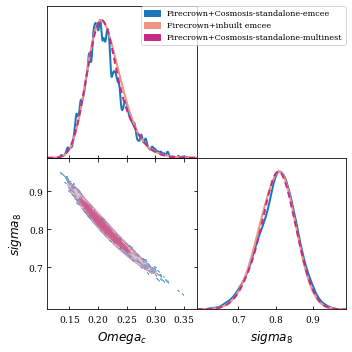

In [9]:
g = plots.getSubplotPlotter(width_inch=5)
g.settings.axes_fontsize   = 11
g.settings.lab_fontsize    = 14
g.settings.legend_fontsize = 10

g.triangle_plot([samples, samples2,samples3], ['Oc', 'sigma8'], 
          filled=[True,True,True], colors=['#1878bb','#f19382','#c52b87'], alphas=[0.9,0.9,0.5], lw=[3,3,3],
          legend_labels=['Firecrown+Cosmosis-standalone-emcee','Firecrown+inbuilt emcee','Firecrown+Cosmosis-standalone-multinest'], 
          legend_loc='upper right', 
          line_args=[{'lw':2, 'color':'#1878bb'}, {'lw':2, 'color':'#f19382'},  {'lw':2, 'ls': '--', 'color':'#c52b87'}], 
          contour_colors=['#1878bb','#f19382','#c52b87'])
mplot.savefig('emcee.pdf', bbox_inches='tight')